# Machine Learning Project Template
* This notebook provides a structured template for building an end-to-end machine learning project.
* Re-use this notebook througout your learning and in capstone project

Citation Request:
  This dataset is public available for research. The details are described in [Cortez and Morais, 2007]. 
  Please include this citation if you plan to use this database:

  P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. 
  In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, 
  Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, 
  Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. 
  Available at: http://www.dsi.uminho.pt/~pcortez/fires.pdf

1. Title: Forest Fires

2. Sources
   Created by: Paulo Cortez and An?bal Morais (Univ. Minho) @ 2007
   
3. Past Usage:

   P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data.
   In Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, 
   December, 2007. (http://www.dsi.uminho.pt/~pcortez/fires.pdf)
   
   In the above reference, the output "area" was first transformed with a ln(x+1) function.
   Then, several Data Mining methods were applied. After fitting the models, the outputs were
   post-processed with the inverse of the ln(x+1) transform. Four different input setups were
   used. The experiments were conducted using a 10-fold (cross-validation) x 30 runs. Two
   regression metrics were measured: MAD and RMSE. A Gaussian support vector machine (SVM) fed
   with only 4 direct weather conditions (temp, RH, wind and rain) obtained the best MAD value:
   12.71 +- 0.01 (mean and confidence interval within 95% using a t-student distribution). The
   best RMSE was attained by the naive mean predictor. An analysis to the regression error curve
   (REC) shows that the SVM model predicts more examples within a lower admitted error. In effect,
   the SVM model predicts better small fires, which are the majority. 
 
4. Relevant Information:

   This is a very difficult regression task. It can be used to test regression methods. Also,
   it could be used to test outlier detection methods, since it is not clear how many outliers
   are there. Yet, the number of examples of fires with a large burned area is very small.

5. Number of Instances: 517 

6. Number of Attributes: 12 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform). 

8. Missing Attribute Values: None

## <b> <font color=green> STEP (1) Problem Definition, Scoping & Framing </font> </b>

### 1.1) Load Libraries
Import all necessary libraries for the project.

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from matplotlib.colors import ListedColormap
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons 

### 1.2) Load The Dataset
Load the dataset and display the first few rows.

In [7]:
column_rename = {
    'X': 'grid_x',
    'Y': 'grid_y',
    'FFMC': 'fuel_moisture',
    'DMC': 'duff_moisture', 
    'DC': 'drought_code',
    'ISI': 'spread_index',
    'temp': 'temp',
    'RH': 'humidity',
    'wind': 'wind',
    'rain': 'rain',
    'area': 'area'
}

data = pd.read_csv('forestfires.csv').rename(columns=column_rename)
data.head()

,grid_x,grid_y,month,day,fuel_moisture,duff_moisture,drought_code,spread_index,temp,humidity,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## <b> <font color=green> STEP (2) Data Exploration & Understanding </font> </b>

### 2.1) Descriptive Statistics
Generate summary statistics for the dataset.

In [8]:
data.describe()

,grid_x,grid_y,fuel_moisture,duff_moisture,drought_code,spread_index,temp,humidity,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### 2.2) Data Visualizations
Visualize the data to identify patterns and relationships.

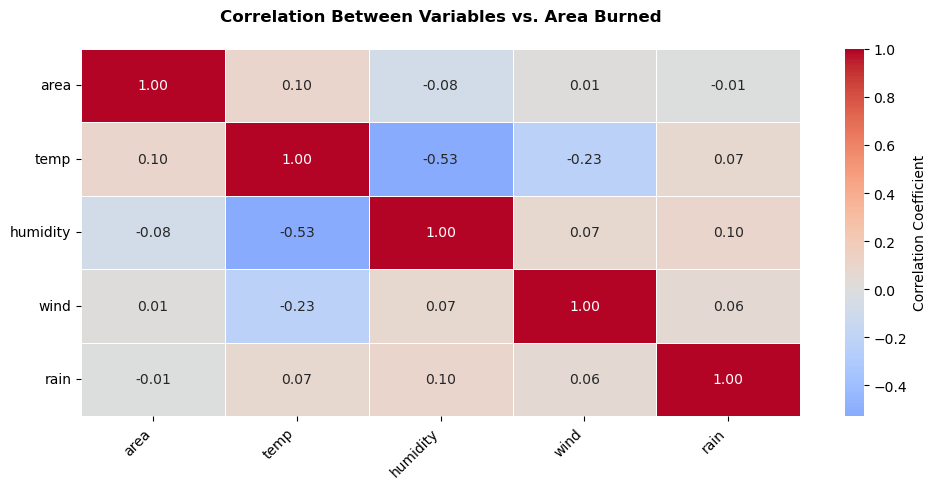

In [31]:
# Visualize correlation between variables
# heat map
numeric_cols = ['area','temp', 'humidity', 'wind', 'rain']
corr_data = data[numeric_cols].corr()
plt.figure(figsize=(10, 5))
sn.heatmap(corr_data, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0,
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
# Improve readability
plt.title('Correlation Between Variables vs. Area Burned', fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

###### 1- Temperature → Burned Area → Strong positive
###### 2- Humidity → Burned Area → Strong negative
###### 3- Wind → Burned Area → Moderate positive
###### 4- Rain → Burned Area → Strong negative

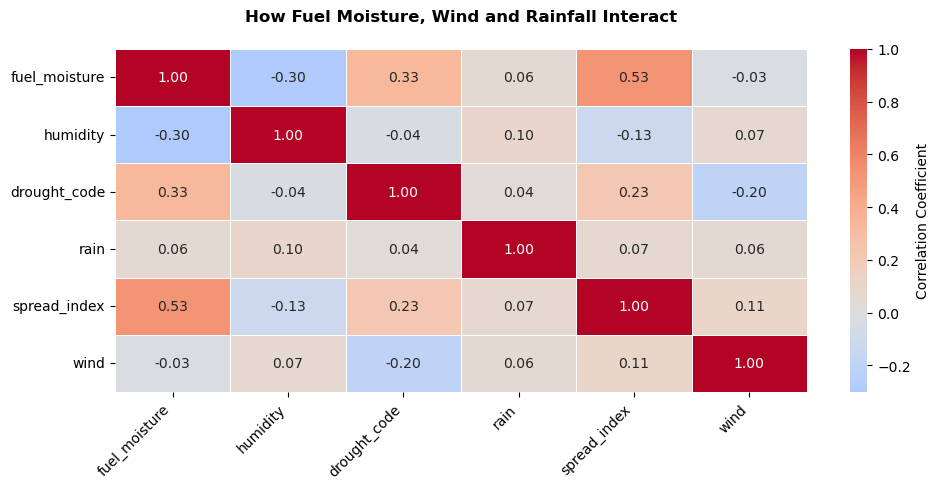

In [32]:
# Visualize correlation between variables
# heat map
numeric_cols = ['fuel_moisture', 'humidity', 'drought_code', 'rain', 'spread_index', 'wind']
corr_data = data[numeric_cols].corr()
plt.figure(figsize=(10, 5))
sn.heatmap(corr_data, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0,
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
# Improve readability
plt.title('How Fuel Moisture, Wind and Rainfall Interact', fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

###### 1- Fine Fuel Moisture vs Humidity → Strong negative
###### 2- Drought Code vs Rainfall → Moderate negative
###### 3- Initial Spread Index vs Wind → Strong positive



C:\Users\Ayaha\AppData\Local\Temp\ipykernel_9232\3094991626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_area.index, y=avg_area.values, palette='viridis')


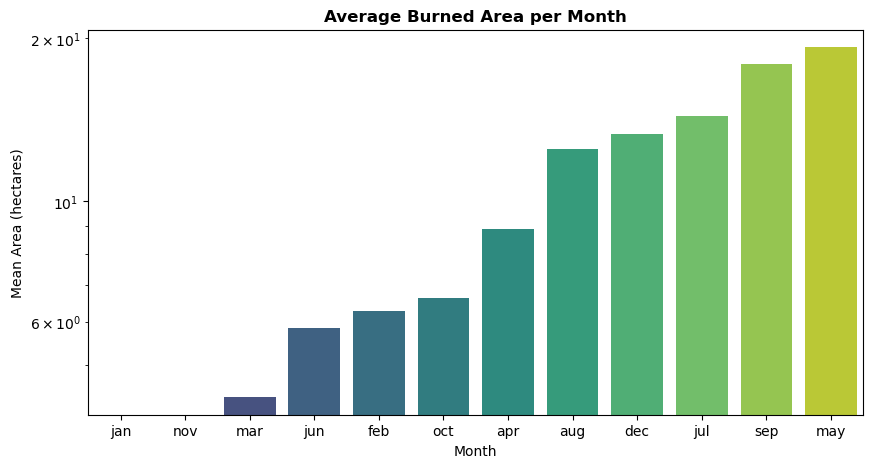

In [17]:
avg_area = data.groupby('month')['area'].mean().sort_values()
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_area.index, y=avg_area.values, palette='viridis')
plt.title('Average Burned Area per Month', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Mean Area (hectares)')
plt.yscale('log')  # Use if data is skewed
plt.show()

C:\Users\Ayaha\AppData\Local\Temp\ipykernel_9232\1028853700.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='flare')


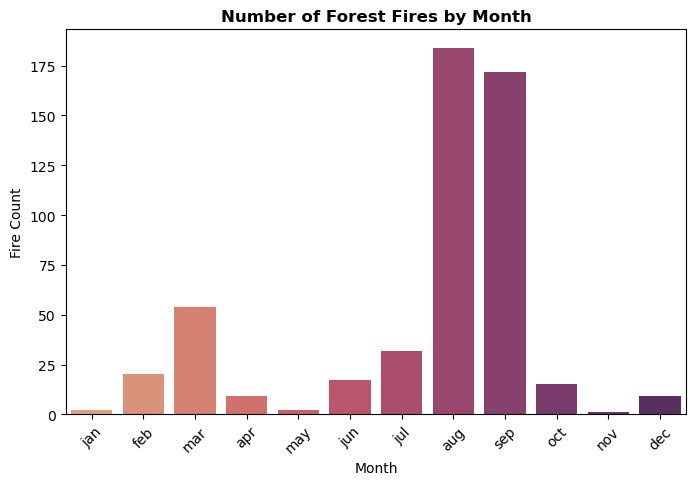

In [18]:
# Count fires per month
monthly_counts = data['month'].value_counts().sort_index()
# Define correct month order (if not already sorted)
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
monthly_counts = monthly_counts.reindex(month_order, fill_value=0)

plt.figure(figsize=(8, 5))
sn.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='flare')
plt.title('Number of Forest Fires by Month', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Fire Count')
plt.xticks(rotation=45)
plt.show()

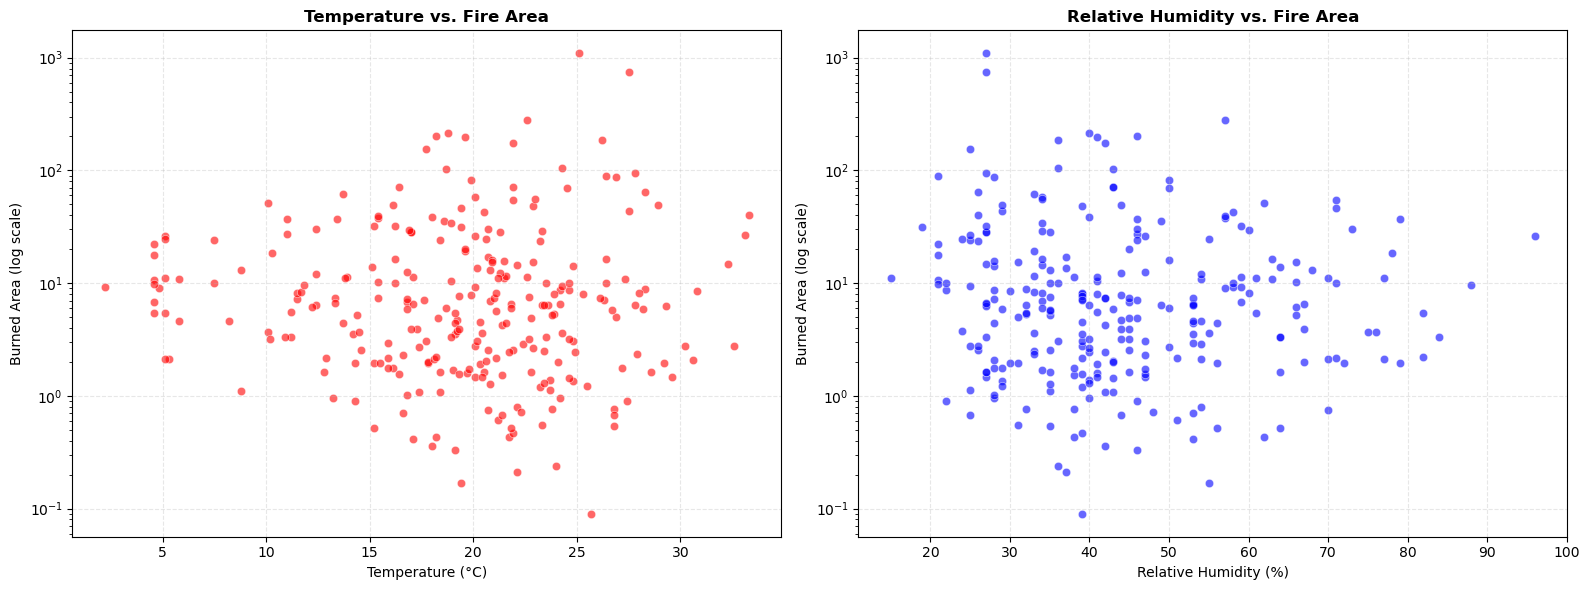

In [20]:
# Filter out rows where area = 0 (unburned areas)
filtered_data = data[data['area'] > 0]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Temperature vs. Fire Size
sns.scatterplot(data=filtered_data, x='temp', y='area', 
                alpha=0.6, color='red', ax=ax1)
ax1.set_title('Temperature vs. Fire Area', fontweight='bold')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Burned Area (hectares)')
ax1.grid(True, linestyle='--', alpha=0.3)

# 2. Humidity vs. Fire Size
sns.scatterplot(data=filtered_data, x='humidity', y='area', 
                alpha=0.6, color='blue', ax=ax2)
ax2.set_title('Relative Humidity vs. Fire Area', fontweight='bold')
ax2.set_xlabel('Relative Humidity (%)')
ax2.set_ylabel('Burned Area (hectares)')
ax2.grid(True, linestyle='--', alpha=0.3)

# Log-transform y-axis if data is skewed
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_ylabel('Burned Area (log scale)')
ax2.set_ylabel('Burned Area (log scale)')

plt.tight_layout()
plt.show()

## <b> <font color=green> STEP (3) Data Preparation & Feature Engineering </font> </b>

### 3.1) Data Cleaning
Handle missing values and outliers.

In [ ]:
## I dont have missing values ..

### 3.1) Feature Selection
Select the most relevant features for the model.

### 3.2) Data Transforms
Apply transformations to prepare the data for modeling.

## <b> <font color=green> STEP (4)  ML Model Selection & Evaluation </font> </b>

### 4.1) Split-out Validation Dataset
Split the dataset into training and validation sets.

### 4.2) Test Options and Evaluation Metric
Define the evaluation metric for the model.

### 4.3) Spot Check Algorithms
Test multiple algorithms to identify the best-performing one.

## <b> <font color=green> STEP (4)  Performance Tuning & Optimization </font> </b>

### 4.1) Algorithm Tuning
Optimize hyperparameters for better performance.

### 4.2) Ensembles
Combine multiple models to improve accuracy.

## <b> <font color=green> STEP (6) Results Interpretation & Deployment </font> </b>

### 6.1) Predictions on Validation Dataset
Make predictions using the validation dataset.

### 6.2) Create Standalone Model on Entire Training Dataset
Train the final model on the entire dataset.

### 6.3) Save Model for Later Use
Save the trained model to a file.